# 1.Importing neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# 2.Read and inspect the data

In [2]:
#load the data
df = pd.read_csv(r"C:\Users\sreej\Documents\Upgrad_learnings\DS\Course2\Assignment1\day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# shape of the dataframe
df.shape

(730, 16)

In [4]:
#Columns and its datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#checking numerical columns statistics
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#Checking missing values
df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [7]:
#Checking for dupliacte rows
df.duplicated().sum()

0

* No need to perform any method to handle missing values since there is no missing values in the data
<br>
* Data frame contains 15 independent (features) and 1 dependent variable (target)
<br>
* Index column and some columns will drop because repetition of same information
<br>
* Renaming the columns for better readability
<br>
* No duplicate rows in the data


In [8]:
# Dropping columns
# instant = index column
# yr and mnth column available so dteday removing 
# removing casual and registered columns data beacause its same info as target column cnt
# Workingday column includes holiday so holiday column removing

dropCol = ['instant','dteday','casual','registered','holiday']
df.drop(labels =dropCol,axis = 1,inplace =True)

In [9]:
df.columns

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [10]:
#Renaming the columns
df.rename(columns={'season':'Season','yr':'Year','mnth':'Month','hum':'Humidity','weathersit':'Weather','cnt':'Count'}, inplace=True)
df.head()

,Season,Year,Month,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
0,1,0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


**From the above columns**
<br>
*Binary : Year,Workingday
<br>
*Categorical :Season,Month,weekday,Weather
<br>
*Numeric :temp,atemp,Humidity,windspeed,Count

# 3.Exploratory Data Analysis(EDA)

## 3.1.Univariate Analysis

### 3.1.1Categorical variable

<AxesSubplot:xlabel='Year', ylabel='Count'>

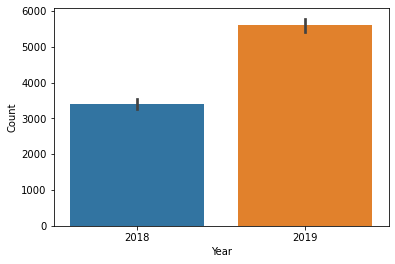

In [11]:
df['Year'] = df['Year'].map({1:2019,0:2018})
sns.barplot('Year','Count',data =df)

* Demand for shared bike increasing from 2018 to 2019

<AxesSubplot:xlabel='workingday', ylabel='Count'>

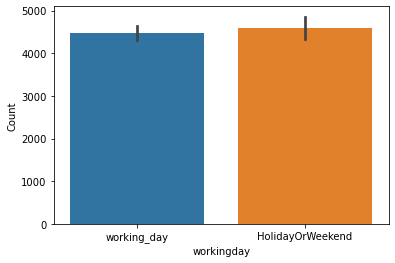

In [12]:
df['workingday'] = df['workingday'].map({1:'working_day',0:'HolidayOrWeekend'})
sns.barplot('workingday','Count',data =df)

* Shared Bike demand almost same for working day or not.Stil we can say demand for shared bikes during Holiday or Weekend more compared to workingday

In [13]:
df['Season'] = df['Season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

<AxesSubplot:xlabel='Season', ylabel='Count'>

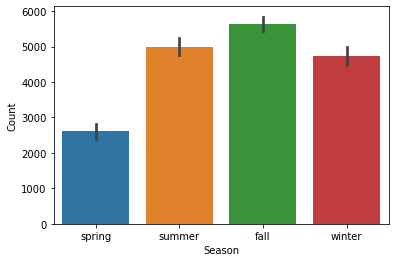

In [14]:
sns.barplot('Season','Count',data=df)

* During Fall season shared bike are more demand and least demand during spring

<AxesSubplot:xlabel='Month', ylabel='Count'>

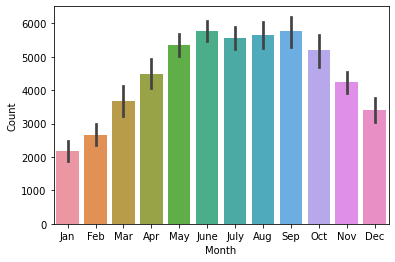

In [15]:
df["Month"]=df["Month"].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
sns.barplot('Month','Count',data =df)

* Least demand in Jan,Feb,Dec 
* More demand in June,Sep,Aug,July

<AxesSubplot:xlabel='Month', ylabel='Count'>

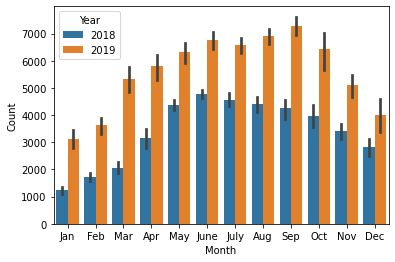

In [16]:
sns.barplot('Month','Count',hue='Year',data=df)

* Month wise shred bikes trend in 2018 and 2019 having some difference
* 2018-more demand in June and 2019-more demand in Sep

<AxesSubplot:xlabel='weekday', ylabel='Count'>

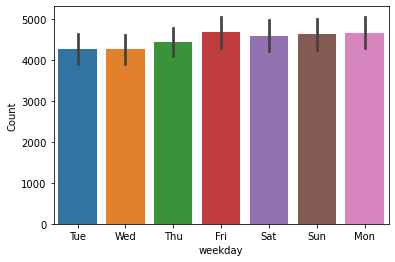

In [17]:
df["weekday"]=df["weekday"].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
sns.barplot('weekday','Count',data =df)

* Tuesday and Wednesday least demand and rest of week having almost same demand 

<AxesSubplot:xlabel='Weather', ylabel='Count'>

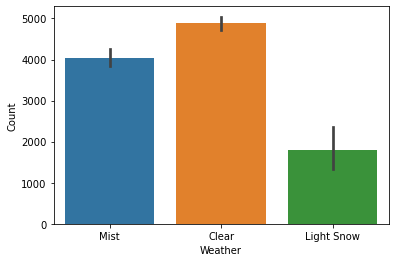

In [18]:
df["Weather"]=df["Weather"].map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})
sns.barplot('Weather','Count',data =df)

* More demand in clear weather and least in Light snow and no demand at all in Heavy Rain

### 3.1.2.Numerical Variable

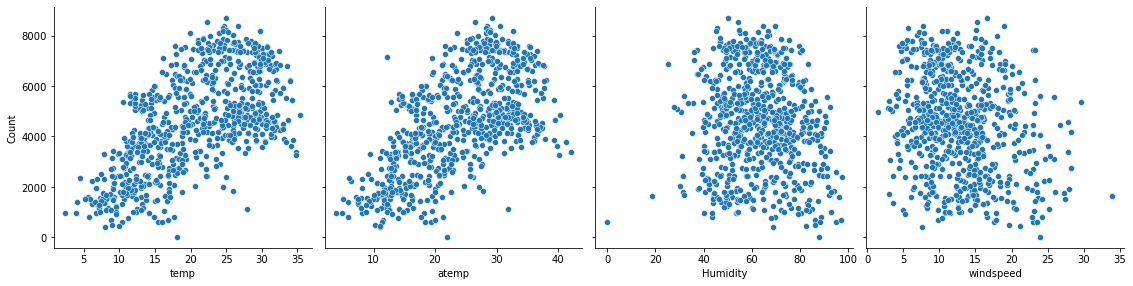

In [19]:
sns.pairplot(df, x_vars=['temp','atemp','Humidity','windspeed'], y_vars='Count',size=4, aspect=1, kind='scatter', diag_kind = None)

* Relation(directly) betwen temp vs count and atemp vs count visible from above graphs

## 3.2.Multivariate analysis

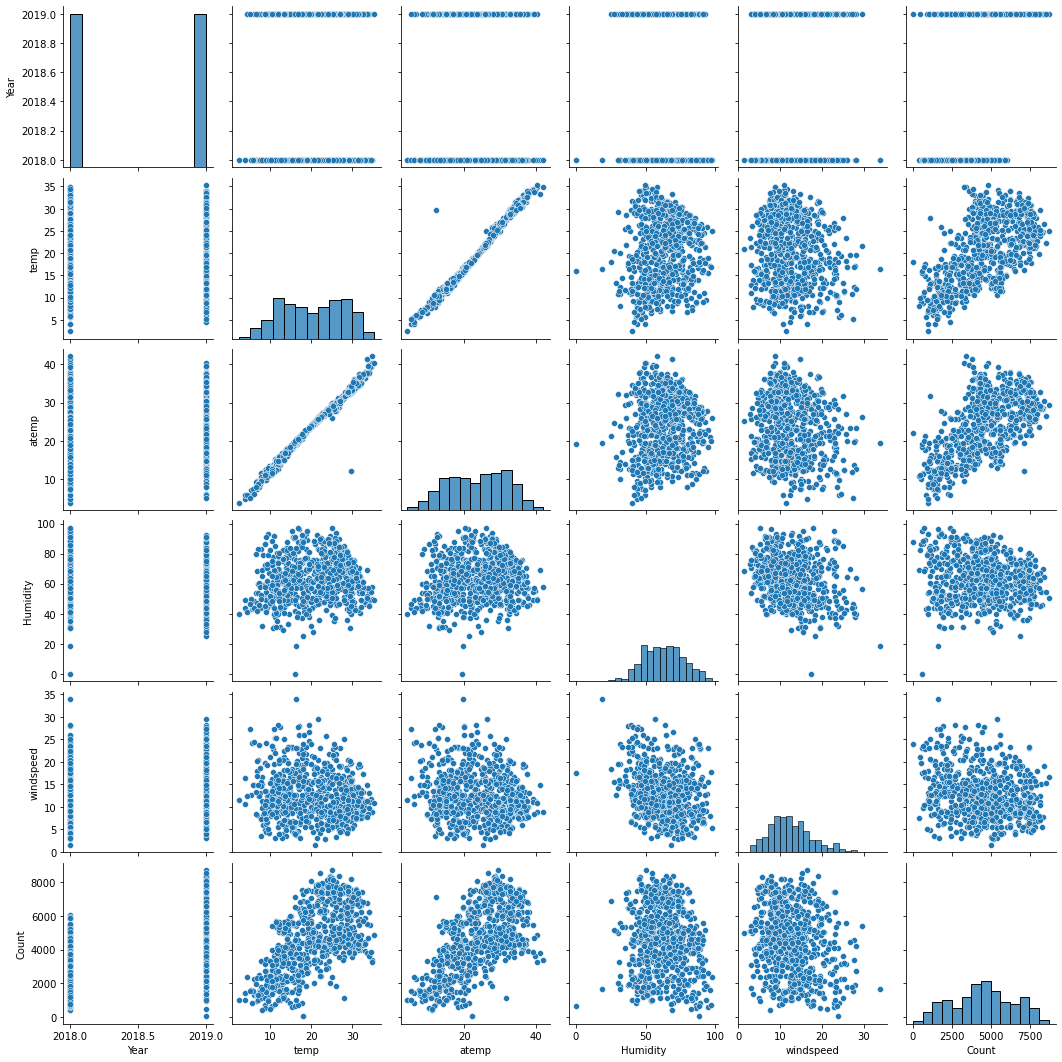

In [20]:
sns.pairplot(df)

<AxesSubplot:>

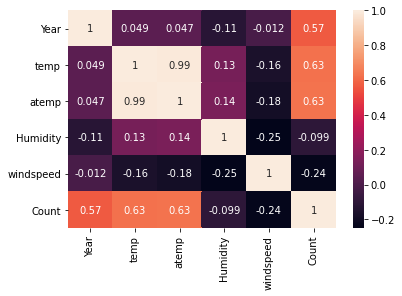

In [21]:
sns.heatmap(df.corr(),annot=True)

* temp and atemp are highly corelated so droping atemp from the data

In [22]:
df.drop('atemp',axis =1,inplace =True)
df.head()

,Season,Year,Month,weekday,workingday,Weather,temp,Humidity,windspeed,Count
0,spring,2018,Jan,Tue,working_day,Mist,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,Wed,working_day,Mist,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,Thu,working_day,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,Fri,working_day,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,Sat,working_day,Clear,9.305237,43.6957,12.522300,1600


# 4.Data Preparation

## 4.1.Creating Dummy Variable for all Categorical columns

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      730 non-null    object 
 1   Year        730 non-null    int64  
 2   Month       730 non-null    object 
 3   weekday     730 non-null    object 
 4   workingday  730 non-null    object 
 5   Weather     730 non-null    object 
 6   temp        730 non-null    float64
 7   Humidity    730 non-null    float64
 8   windspeed   730 non-null    float64
 9   Count       730 non-null    int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 57.2+ KB


In [24]:
#Converting Year datatype to object
df["Year"]= df["Year"].astype('object')

In [25]:
#Selecting all features having data type object
cat = df.select_dtypes(include = ['object'])
cat.head()

,Season,Year,Month,weekday,workingday,Weather
0,spring,2018,Jan,Tue,working_day,Mist
1,spring,2018,Jan,Wed,working_day,Mist
2,spring,2018,Jan,Thu,working_day,Clear
3,spring,2018,Jan,Fri,working_day,Clear
4,spring,2018,Jan,Sat,working_day,Clear


In [26]:
#Creating dummy variables
Seasons = pd.get_dummies(df['Season'],drop_first=True)

year = pd.get_dummies(df['Year'],drop_first = True)

month= pd.get_dummies(df['Month'],drop_first=True)

week_day= pd.get_dummies(df['weekday'],drop_first=True)

working_day = pd.get_dummies(df['workingday'],drop_first=True)

weather= pd.get_dummies(df['Weather'],drop_first=True)

In [27]:
#concatenating all dummy variables to data frame
df = pd.concat([df,Seasons,year,month,week_day,working_day,weather],axis = 1)

In [28]:
#Drop all the categorical columns from the df dataframe
df.drop(['Season','Year','Month','weekday','workingday','Weather'],axis =1,inplace =True)

In [29]:
df.head()

,temp,Humidity,windspeed,Count,spring,summer,winter,2019,Aug,Dec,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,working_day,Light Snow,Mist
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


## 4.2.Data Split

In [30]:
#Importing sklearn libraries for Linear regression model building
#split the data like 70% train and 30% test

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size =0.7,random_state =100)

In [31]:
df_train.head()

,temp,Humidity,windspeed,Count,spring,summer,winter,2019,Aug,Dec,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,working_day,Light Snow,Mist
576,29.246653,70.4167,11.083475,7216,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
426,16.980847,62.1250,10.792293,4066,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
728,10.489153,48.3333,23.500518,1796,1,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
482,15.443347,48.9583,8.708325,4220,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
111,13.803347,72.9583,14.707907,1683,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [32]:
df_test.head()

,temp,Humidity,windspeed,Count,spring,summer,winter,2019,Aug,Dec,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,working_day,Light Snow,Mist
184,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
535,32.082500,59.2083,7.625404,6211,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
221,31.433347,42.4167,13.417286,4780,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
152,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [33]:
# verify the columns and rows
print(f'Train data shape{df_train.shape}\nTest data shape{df_test.shape}')

Train data shape(510, 28)
Test data shape(220, 28)


## 4.3.Scaling 

In [34]:
#Importing MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [35]:
# Apply scaler() to all the columns except the'dummy' variables

num_vars = ['temp',  'Humidity', 'windspeed', 'Count']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train[num_vars].head()

,temp,Humidity,windspeed,Count
576,0.815169,0.725633,0.264686,0.827658
426,0.442393,0.640189,0.255342,0.465255
728,0.245101,0.498067,0.663106,0.204096
482,0.395666,0.504508,0.188475,0.482973
111,0.345824,0.751824,0.380981,0.191095


# 5.Model building

In [36]:
# Data split to X_train and y_train sets for the model building
y_train = df_train.pop('Count')
X_train = df_train
print(y_train.shape, X_train.shape)

(510,) (510, 27)


In [37]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [39]:
#X_train column
X_train.columns

Index([       'temp',    'Humidity',   'windspeed',      'spring',
            'summer',      'winter',          2019,         'Aug',
               'Dec',         'Feb',         'Jan',        'July',
              'June',         'Mar',         'May',         'Nov',
               'Oct',         'Sep',         'Mon',         'Sat',
               'Sun',         'Thu',         'Tue',         'Wed',
       'working_day',  'Light Snow',        'Mist'],
      dtype='object')

In [40]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True, False, False, False, False, False,  True,
        True, False,  True, False, False, False,  True,  True,  True])

In [41]:
#list of features selected by RFE
col = X_train.columns[rfe.support_]
col

Index([       'temp',    'Humidity',   'windspeed',      'spring',
            'summer',      'winter',          2019,         'Jan',
              'July',         'Sep',         'Mon',         'Sun',
       'working_day',  'Light Snow',        'Mist'],
      dtype='object')

In [42]:
#New train dataframe with RFE selected features
X_train_rfe = X_train[col]
X_train_rfe.head()

,temp,Humidity,windspeed,spring,summer,winter,2019,Jan,July,Sep,Mon,Sun,working_day,Light Snow,Mist
576,0.815169,0.725633,0.264686,0,0,0,1,0,1,0,0,0,1,0,0
426,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,1,0,0,0,1
728,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,1,0,0
482,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,1,0,0,0,1
111,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,1,0,0,0,1


## 5.1.Model 1

In [43]:
# importing statsmodels
import statsmodels.api as sm

# Adding a variable constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Creating model1
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.8
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.74e-187
Time:                        14:38:12   Log-Likelihood:                 511.01
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     494   BIC:                            -922.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2016      0.045      4.485      0.000       0.113       0.290
temp            0.5124      0.035     14.661      0.000       0.444       0.581
Humidity       -0.1606      0.038     -4.231      0.000      -0.235      -0.086
windspeed      -0.1884      0.026     -7.273      0.000      -0.239      -0.137
spring         -0.0513      0.021     -2.438      0.015      -0.093      -0.010
summer          0.0513      0.015      3.398      0.001       0.022       0.081
winter          0.0912      0.018      5.194      0.000       0.057       0.126
2019            0.2309      0.008     28.365      0.000       0.215       0.247
Jan            -0.0332      0.018     -1.880      0.061      -0.068       0.002
July           -0.0558      0.018     -3.043      0.002      -0.092      -0.020
Sep             0.0822      0.017      4.908      0.000       0.049       0.115
Mon             0.1050      0.030      3.557      0.000       0.047       0.163
Sun             0.0986      0.030      3.330      0.001       0.040       0.157
working_day     0.0852      0.028      3.061      0.002       0.030       0.140
Light Snow     -0.2397      0.026     -9.067      0.000      -0.292      -0.188
Mist           -0.0544      0.011     -5.152      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       68.683   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.430
Skew:                          -0.734   Prob(JB):                     2.16e-33
Kurtosis:                       5.219   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# importing variance_inflation_factor to check the VIF values of the variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Humidity,32.97
12,working_day,21.16
0,temp,20.31
3,spring,5.10
2,windspeed,4.99
10,Mon,4.81
11,Sun,4.64
5,winter,3.84
4,summer,3.07
14,Mist,2.33


## 5.2.Model 2


**Removing feature - Humidity due very high VIF value**

In [45]:
X_train_rfe2 = X_train_rfe.drop('Humidity', axis = 1)

# Adding a variable constant
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Creating model2
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.0
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          7.95e-185
Time:                        14:38:12   Log-Likelihood:                 501.94
No. Observations:                 510   AIC:                            -973.9
Df Residuals:                     495   BIC:                            -910.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1216      0.041      2.933      0.004       0.040       0.203
temp            0.4739      0.034     13.811      0.000       0.406       0.541
windspeed      -0.1574      0.025     -6.230      0.000      -0.207      -0.108
spring         -0.0605      0.021     -2.847      0.005      -0.102      -0.019
summer          0.0449      0.015      2.940      0.003       0.015       0.075
winter          0.0758      0.017      4.342      0.000       0.042       0.110
2019            0.2349      0.008     28.573      0.000       0.219       0.251
Jan            -0.0378      0.018     -2.112      0.035      -0.073      -0.003
July           -0.0509      0.019     -2.733      0.006      -0.088      -0.014
Sep             0.0762      0.017      4.492      0.000       0.043       0.110
Mon             0.1099      0.030      3.666      0.000       0.051       0.169
Sun             0.1033      0.030      3.432      0.001       0.044       0.162
working_day     0.0870      0.028      3.076      0.002       0.031       0.143
Light Snow     -0.2839      0.025    -11.501      0.000      -0.332      -0.235
Mist           -0.0801      0.009     -9.133      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       69.147   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.069
Skew:                          -0.744   Prob(JB):                     4.27e-33
Kurtosis:                       5.191   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,working_day,18.64
0,temp,13.72
1,windspeed,4.84
9,Mon,4.40
2,spring,4.31
10,Sun,4.26
4,winter,2.95
3,summer,2.80
5,2019,2.07
6,Jan,1.65


## 5.3.Model 3


**Removing feature - Jan because it is having highest p value among other features and i want to keep working_day**

In [47]:
X_train_rfe3 = X_train_rfe2.drop('Jan', axis = 1)

# Add a variable constant
X_train_lm3 = sm.add_constant(X_train_rfe3)

#Creating model3
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.3
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          5.10e-185
Time:                        14:38:12   Log-Likelihood:                 499.65
No. Observations:                 510   AIC:                            -971.3
Df Residuals:                     496   BIC:                            -912.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1050      0.041      2.569      0.010       0.025       0.185
temp            0.4926      0.033     14.808      0.000       0.427       0.558
windspeed      -0.1505      0.025     -5.987      0.000      -0.200      -0.101
spring         -0.0659      0.021     -3.112      0.002      -0.108      -0.024
summer          0.0480      0.015      3.146      0.002       0.018       0.078
winter          0.0819      0.017      4.735      0.000       0.048       0.116
2019            0.2342      0.008     28.412      0.000       0.218       0.250
July           -0.0526      0.019     -2.818      0.005      -0.089      -0.016
Sep             0.0767      0.017      4.503      0.000       0.043       0.110
Mon             0.1112      0.030      3.696      0.000       0.052       0.170
Sun             0.1039      0.030      3.440      0.001       0.045       0.163
working_day     0.0878      0.028      3.094      0.002       0.032       0.144
Light Snow     -0.2827      0.025    -11.414      0.000      -0.331      -0.234
Mist           -0.0810      0.009     -9.214      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       68.220   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.101
Skew:                          -0.735   Prob(JB):                     1.14e-32
Kurtosis:                       5.182   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,working_day,18.16
0,temp,13.27
1,windspeed,4.80
8,Mon,4.32
9,Sun,4.17
2,spring,3.93
4,winter,2.94
3,summer,2.80
5,2019,2.07
6,July,1.60


## 5.4.Model 4

**Removing feature - working_day due to VIF and all the other features having less p values**

In [49]:
X_train_rfe4 = X_train_rfe3.drop('working_day', axis = 1)

# Add a variable constant
X_train_lm4 = sm.add_constant(X_train_rfe4)

# Creating model4
lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.1
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          3.89e-184
Time:                        14:38:12   Log-Likelihood:                 494.77
No. Observations:                 510   AIC:                            -963.5
Df Residuals:                     497   BIC:                            -908.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1919      0.030      6.418      0.000       0.133       0.251
temp           0.4917      0.034     14.656      0.000       0.426       0.558
windspeed     -0.1504      0.025     -5.933      0.000      -0.200      -0.101
spring        -0.0692      0.021     -3.243      0.001      -0.111      -0.027
summer         0.0478      0.015      3.111      0.002       0.018       0.078
winter         0.0804      0.017      4.613      0.000       0.046       0.115
2019           0.2339      0.008     28.134      0.000       0.218       0.250
July          -0.0518      0.019     -2.750      0.006      -0.089      -0.015
Sep            0.0732      0.017      4.271      0.000       0.040       0.107
Mon            0.0259      0.012      2.132      0.034       0.002       0.050
Sun            0.0186      0.012      1.497      0.135      -0.006       0.043
Light Snow    -0.2803      0.025    -11.228      0.000      -0.329      -0.231
Mist          -0.0803      0.009     -9.059      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       76.300   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.656
Skew:                          -0.789   Prob(JB):                     4.36e-39
Kurtosis:                       5.413   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.22
1,windspeed,4.61
3,summer,2.23
2,spring,2.09
5,2019,2.07
4,winter,1.77
6,July,1.59
11,Mist,1.56
7,Sep,1.33
8,Mon,1.19


## 5.5.Model 5

**Removing feature- Mon due high p value and I want to keep temp**

In [51]:
X_train_rfe5 = X_train_rfe4.drop('Mon', axis = 1)

# Add a variable constant
X_train_lm5 = sm.add_constant(X_train_rfe5)

# Creating model5
lr5 = sm.OLS(y_train, X_train_lm5).fit()

lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.8
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          2.42e-184
Time:                        14:38:13   Log-Likelihood:                 492.45
No. Observations:                 510   AIC:                            -960.9
Df Residuals:                     498   BIC:                            -910.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1960      0.030      6.544      0.000       0.137       0.255
temp           0.4909      0.034     14.581      0.000       0.425       0.557
windspeed     -0.1492      0.025     -5.863      0.000      -0.199      -0.099
spring        -0.0698      0.021     -3.261      0.001      -0.112      -0.028
summer         0.0469      0.015      3.043      0.002       0.017       0.077
winter         0.0793      0.017      4.535      0.000       0.045       0.114
2019           0.2341      0.008     28.065      0.000       0.218       0.251
July          -0.0507      0.019     -2.682      0.008      -0.088      -0.014
Sep            0.0733      0.017      4.263      0.000       0.040       0.107
Sun            0.0145      0.012      1.175      0.240      -0.010       0.039
Light Snow    -0.2813      0.025    -11.231      0.000      -0.331      -0.232
Mist          -0.0788      0.009     -8.889      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       70.342   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.595
Skew:                          -0.716   Prob(JB):                     9.03e-38
Kurtosis:                       5.445   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.17
1,windspeed,4.60
3,summer,2.23
2,spring,2.08
5,2019,2.07
4,winter,1.77
6,July,1.58
10,Mist,1.55
7,Sep,1.33
8,Sun,1.15


## 5.6.Model 6

**Removing feature- Sun due to high p value and I want to keep temp**

In [53]:
X_train_rfe6 = X_train_rfe5.drop('Sun', axis = 1)

# Add a variable constant
X_train_lm6 = sm.add_constant(X_train_rfe6)

# Creating model6
lr6 = sm.OLS(y_train, X_train_lm6).fit()

lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.8
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          3.00e-185
Time:                        14:38:13   Log-Likelihood:                 491.75
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     499   BIC:                            -914.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1974      0.030      6.593      0.000       0.139       0.256
temp           0.4920      0.034     14.611      0.000       0.426       0.558
windspeed     -0.1496      0.025     -5.880      0.000      -0.200      -0.100
spring        -0.0696      0.021     -3.247      0.001      -0.112      -0.027
summer         0.0469      0.015      3.038      0.003       0.017       0.077
winter         0.0792      0.017      4.527      0.000       0.045       0.114
2019           0.2339      0.008     28.037      0.000       0.218       0.250
July          -0.0510      0.019     -2.697      0.007      -0.088      -0.014
Sep            0.0734      0.017      4.263      0.000       0.040       0.107
Light Snow    -0.2800      0.025    -11.186      0.000      -0.329      -0.231
Mist          -0.0785      0.009     -8.851      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       69.942   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.479
Skew:                          -0.711   Prob(JB):                     9.57e-38
Kurtosis:                       5.450   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.09
1,windspeed,4.60
3,summer,2.23
2,spring,2.07
5,2019,2.07
4,winter,1.77
6,July,1.58
9,Mist,1.55
7,Sep,1.33
8,Light Snow,1.08


## 5.7.Model 7

**Removing feature -July**

In [55]:
X_train_rfe7 = X_train_rfe6.drop('July', axis = 1)

# Add a variable constant
X_train_lm7 = sm.add_constant(X_train_rfe7)

# Creating model7
lr7 = sm.OLS(y_train, X_train_lm7).fit()

lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     267.8
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          6.51e-185
Time:                        14:38:13   Log-Likelihood:                 488.06
No. Observations:                 510   AIC:                            -956.1
Df Residuals:                     500   BIC:                            -913.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1890      0.030      6.308      0.000       0.130       0.248
temp           0.4790      0.034     14.284      0.000       0.413       0.545
windspeed     -0.1498      0.026     -5.849      0.000      -0.200      -0.099
spring        -0.0580      0.021     -2.747      0.006      -0.100      -0.017
summer         0.0621      0.014      4.301      0.000       0.034       0.091
winter         0.0917      0.017      5.402      0.000       0.058       0.125
2019           0.2345      0.008     27.936      0.000       0.218       0.251
Sep            0.0873      0.017      5.282      0.000       0.055       0.120
Light Snow    -0.2809      0.025    -11.152      0.000      -0.330      -0.231
Mist          -0.0771      0.009     -8.656      0.000      -0.095      -0.060
==============================================================================
Omnibus:                       73.466   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.169
Skew:                          -0.748   Prob(JB):                     3.38e-39
Kurtosis:                       5.470   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.59
0,temp,3.84
5,2019,2.07
2,spring,1.98
3,summer,1.90
4,winter,1.61
8,Mist,1.55
6,Sep,1.22
7,Light Snow,1.08


## 5.8.Model 8

**Removing feature-spring to reduce the p values and VIF**

In [57]:
X_train_rfe8 = X_train_rfe7.drop('spring', axis = 1)

# Add a variable constant
X_train_lm8 = sm.add_constant(X_train_rfe8)

# Creating model8
lr8 = sm.OLS(y_train, X_train_lm8).fit()

lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     296.5
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.53e-184
Time:                        14:38:14   Log-Likelihood:                 484.24
No. Observations:                 510   AIC:                            -950.5
Df Residuals:                     501   BIC:                            -912.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1209      0.017      7.140      0.000       0.088       0.154
temp           0.5527      0.020     27.295      0.000       0.513       0.592
windspeed     -0.1552      0.026     -6.041      0.000      -0.206      -0.105
summer         0.0894      0.011      8.460      0.000       0.069       0.110
winter         0.1281      0.011     12.051      0.000       0.107       0.149
2019           0.2332      0.008     27.645      0.000       0.217       0.250
Sep            0.0978      0.016      6.052      0.000       0.066       0.130
Light Snow    -0.2785      0.025    -10.993      0.000      -0.328      -0.229
Mist          -0.0767      0.009     -8.553      0.000      -0.094      -0.059
==============================================================================
Omnibus:                       65.957   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.455
Skew:                          -0.715   Prob(JB):                     1.92e-31
Kurtosis:                       5.148   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe8.values, i) for i in range(X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,3.68
1,windspeed,3.03
4,2019,2.00
2,summer,1.57
7,Mist,1.48
3,winter,1.37
5,Sep,1.20
6,Light Snow,1.08


## 5.9.Model Interpretation

**All features having less VIF(<5) and p- values<0.05**
<br>
**F-Statistics= 296.5 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant**
<br>
**Variable Coefficients of best fitted line**
<br>
* const = 0.1209(Shared bike demand increase by 0.1209 in the absence of the varaiables)
* temp	= 0.5527(shared bike demand increase by 0.5527 for one unit temp)
* windspeed = -0.1552(shared bike demand decrease by 0.1552 for one unit windspeed)
* summer = 0.0894(shared bike demand increase by 0.0894 for one unit summer)
* winter =	0.1281(shared bike demand increase by 0.1281 for one unit winter)
* 2019 = 0.2332 (shared bike demand incease by 0.2332 for one unit 2019)
* Sep = 0.0978(shared bike demand increase by 0.0978 for one unit Sep)
* Light Snow = -0.2785(shared bike demand decrease by 0.2785 for one unit Light snow)
* Mist = -0.0767(shared bike demand decrease by 0.0767 for one unit Mist)

# 6.Validate Assumptions

## 6.1.Resudual Analysis

In [59]:
y_train_pred = lr8.predict(X_train_lm8)

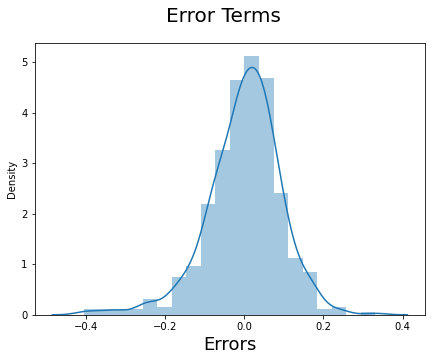

In [60]:
# residual calculations
res = y_train - y_train_pred

# Plot the histogram of the error terms

fig = plt.figure(figsize=[7,5])
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

* Errors are normaly distributed and assumption is valid

## 6.2.Homoscedasticity check

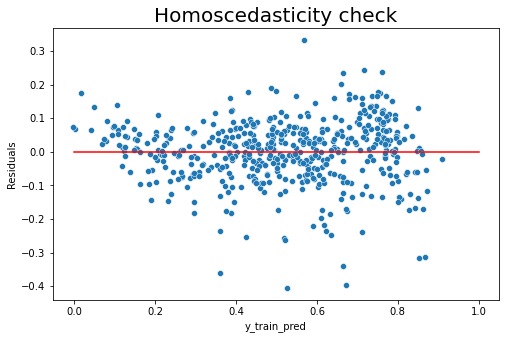

In [61]:
# Check for Homoscedasticity
plt.figure(figsize = [8,5])
p = sns.scatterplot(y_train_pred,res)
plt.xlabel('y_train_pred')
plt.ylabel('Residuals')

p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Homoscedasticity check', fontsize = 20)

* Residuals have equal or almost equal variance across the regression line and assumption is valid

# 7.Prediction

In [62]:
# Apply scaler() to all numeric variables in test dataset
num_vars=['temp','Humidity','windspeed','Count']

df_test[num_vars]= scaler.transform(df_test[num_vars])

In [63]:
#Split the data to y_test and X_test
y_test = df_test.pop('Count')
X_test = df_test

In [64]:
#Selecting the variables that were part of final model (Model 8).
col_test = X_train_rfe8.columns

X_test = X_test[col_test]

# Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)

X_test_lm8.head()

,const,temp,windspeed,summer,winter,2019,Sep,Light Snow,Mist
184,1.0,0.831783,0.084219,0,0,0,0,0,1
535,1.0,0.901354,0.153728,1,0,1,0,0,0
299,1.0,0.511964,0.334206,0,1,0,0,0,1
221,1.0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0.817246,0.537414,1,0,0,0,0,0


In [65]:
# Making predictions using the final model (lr8)

y_test_pred = lr8.predict(X_test_lm8)

In [66]:
y_test_pred.head()

184    0.490865
535    0.917756
299    0.403455
221    0.555443
152    0.578553
dtype: float64

# 8.Evaluation

Text(0, 0.5, 'Predictions')

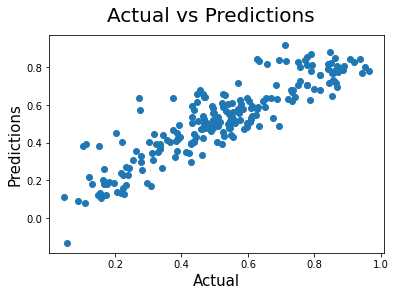

In [67]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=20)
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predictions', fontsize=15) 

## 8.1.Residaul Analysis(both train and test)

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7907818070220924

In [69]:
r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))

Test data r^2 : 79.08
Train data r^2 : 82.56


# 9.Conclusion

**R-Squared value of Test data and Train data are good and not have much difference,that confirms this model can be used for prediction**
<br>
**Below mentioned varaibles have influence with shared bike demand(according to the model I evaluted)**
* Temperature in Celsius
* Wind speed
* Season of summer
* Season of winter
* Year of 2019
* Month of Sep
* Weather of Light Snow or Light Rain + Thunderstorm + Scattered clouds or Light Rain + Scattered clouds
* Weather of Mist + Cloudy or Mist + Broken clouds or Mist + Few clouds or Mist 